In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import linear_model
from sklearn.feature_selection import RFE

logistic_regression = linear_model.LogisticRegression()

In [16]:
waves = pd.read_csv('../binary/Wavelength.csv', header=None)
x = pd.read_csv('../binary/X.csv', header=None)
y = pd.read_csv('../binary/y.csv', header=None)

In [17]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [18]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,911,912,913,914,915,916,917,918,919,920
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,...,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,-7.285778,26.623167,-39.141444,31.432056,19.583389,-27.309889,-1.363278,16.758222,-1.462556,20.104333,...,17.075222,-0.391444,6.723667,-10.397389,6.965833,-17.164222,2.614111,-0.534778,7.659167,27.403722
std,28.066784,38.301483,38.125418,16.871401,19.078221,25.123531,28.830671,24.518862,24.424941,22.169355,...,24.204869,27.783458,32.377364,34.395392,35.424993,42.765649,33.565696,30.336068,23.692330,20.522360
min,-74.140000,-92.590000,-143.410000,-13.050000,-25.910000,-87.240000,-72.790000,-64.190000,-79.430000,-44.400000,...,-25.340000,-45.670000,-50.880000,-70.100000,-64.090000,-92.670000,-59.460000,-55.220000,-37.350000,-12.100000
25%,-24.740000,2.035000,-63.590000,19.257500,6.325000,-41.460000,-20.357500,2.350000,-15.630000,5.200000,...,-4.470000,-24.952500,-23.310000,-44.620000,-25.830000,-59.050000,-26.330000,-27.592500,-13.342500,8.255000
50%,-8.725000,28.960000,-35.035000,31.315000,18.445000,-27.265000,-1.695000,16.980000,0.300000,19.925000,...,19.210000,-5.640000,4.385000,-10.635000,5.745000,-18.400000,-2.005000,0.430000,8.120000,29.080000
75%,11.212500,52.927500,-12.890000,44.292500,34.950000,-8.497500,19.560000,35.207500,14.840000,33.822500,...,38.465000,25.162500,36.692500,21.817500,39.475000,20.445000,32.507500,26.692500,29.067500,45.830000
max,71.960000,145.480000,58.810000,72.410000,66.890000,47.220000,82.840000,79.350000,71.910000,75.150000,...,63.680000,48.820000,66.170000,57.770000,71.210000,56.550000,68.440000,62.360000,47.640000,65.770000


In [19]:
waves.size

921

In [20]:
x.size

165780

In [21]:
x.head()
waves.head()

,0
0,420.852
1,421.228
2,421.605
3,421.982
4,422.358


In [22]:
b = waves.T.as_matrix(columns=None).flatten()
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.size, y_train.size)
print(x_test.size, y_test.size)

116046 126
49734 54


In [23]:
y_train = y_train.as_matrix(columns=None)

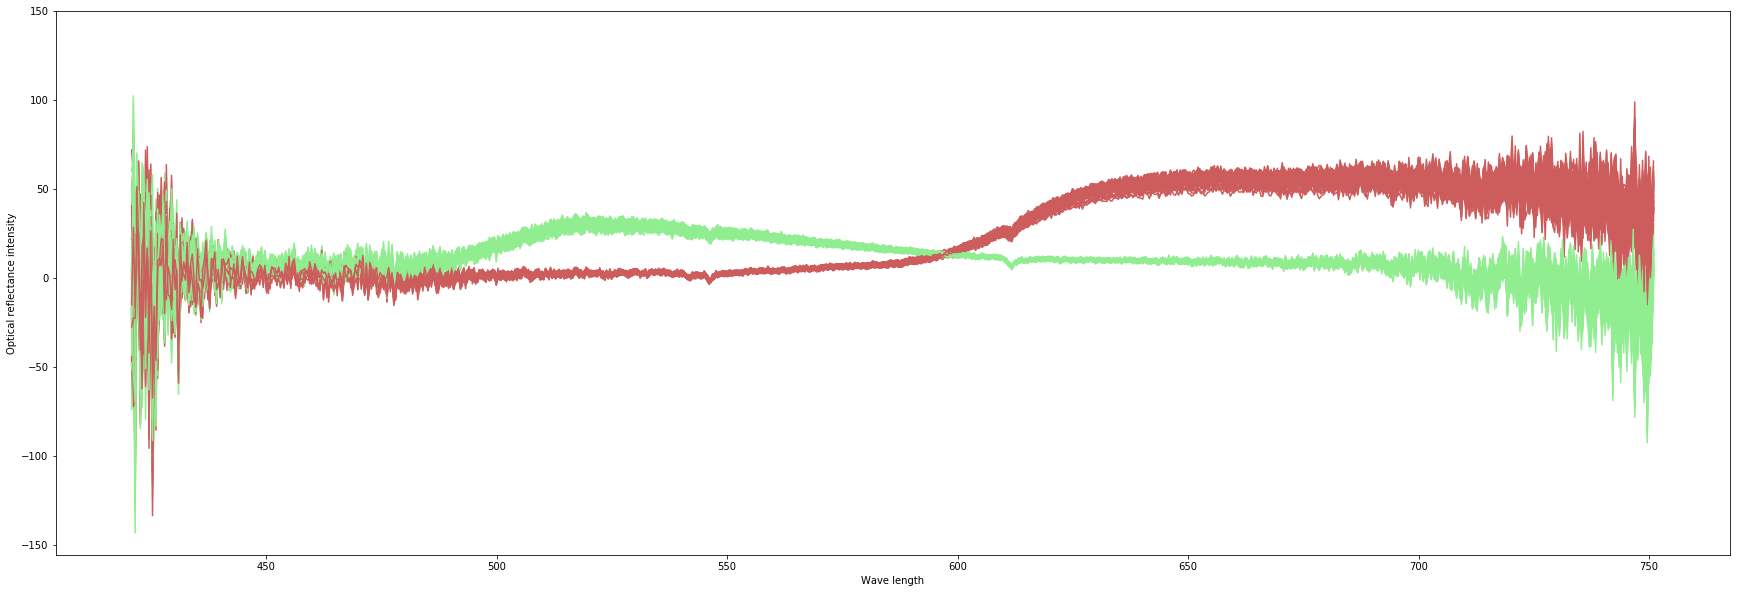

In [66]:
index = 0
for ind, row in x_train.iterrows():
    if y_train[index] == 1:
        plt.plot(b, row, color="indianred")
    else:
        plt.plot(b, row, color="lightgreen")
    index += 1
    
plt.xlabel("Wave length", fontdict=None, labelpad=None)
plt.ylabel("Optical reflectance intensity", fontdict=None, labelpad=None)
plt.yticks([-150, -100, -50, 0, 50, 100, 150])  
# plt.axvspan(727, 727, color='grey', alpha=0.5)
plt.show()

In [25]:
# http://scikit-learn.org/0.16/auto_examples/model_selection/plot_confusion_matrix.html

In [26]:
logistic_regression.fit(x_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
y_res = logistic_regression.predict(x_train)

In [28]:
accuracy_score(y_train, y_res)

1.0

In [78]:
selector = RFE(logistic_regression, 2, step=1)

In [79]:
selector = selector.fit(x_train, y_train)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
selector.support_ 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [81]:
def get_true_indices(matrix):
    indices = []
    index = 0
    for i in matrix:
        if i == True:
            indices.append(index)
        index += 1
    return indices

In [82]:
indices = get_true_indices(selector.support_)

In [83]:
indices

[852, 908]

In [84]:
x_train[indices[0]]
waves.iloc[[indices[0]]]

,0
852,727.807


In [85]:
def get_wave_values(waves, indices):
    values = []
    
    for i in indices:
        print(i)
        values.append(waves.iloc[[i]])
            
    return values

In [86]:
get_wave_values(waves, indices)

852
908


[           0
 852  727.807,            0
 908  746.877]